<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Football Player Detection and Tracking</title>
    <style>
        body {
            font-family: 'Arial', sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 0;
        }
        h1 {
            background-color:rgb(113, 180, 177);
            color: #ecf0f1;
            padding: 20px;
            text-align: center;
        }
        h2 {
            color:rgb(69, 146, 111);
            font-size: 1.8rem;
            margin-bottom: 15px;
            border-bottom: 2px solidrgb(104, 135, 167);
            padding-bottom: 5px;
        }
        h3, h4 {
            font-size: 1.3rem;
            color:rgb(137, 184, 228);
        }
        ul {
            list-style-type: none;
            padding-left: 0;
        }
        li {
            margin: 10px 0;
            font-size: 1.1rem;
        }
        .highlight {
            font-weight: bold;
            color: #e74c3c;
        }
    </style>
</head>
<body>

# 🏆 Football Player Detection and Tracking ⚽️

---

## Business Objective 🎯

- **⚽️Displaying player and ball movements on a tactical field:**  
Visualize player and ball trajectories on a 2D tactical field for enhanced analysis to optimize performance analysis and scouting processes for football teams.

---

## Dataset: Match Videos 🎥

### Objectives

#### 1. Match Performance Analysis 🔍
- **Track player movements on the field:**  
  Use advanced computer vision techniques to monitor and analyze player positioning, speed, and movement patterns during the match.
  
- **Identify key actions (shots, assists, successful dribbles):**  
  Implement action recognition algorithms to detect and log critical events such as shots on goal, assists, and successful dribbles.


#### 2. Player Recognition and Tracking 🏃‍♂️🔍
- **Apply a computer vision model to identify players:**  
  Use object detection and deep learning models to recognize individual players based on jersey colors, numbers, and other visual features.

- **Track player and ball trajectories:**  
  Continuously monitor and record the paths of players and the ball to provide insights into team dynamics and individual performance.

- **Detect opposing team tactical patterns:**  
  Analyze the tactical formations and strategies of the opposing team to identify recurring patterns and potential weaknesses.



## Proposed Solution Workflow 🛠️

1. **Data Collection:**  
   Gather high-quality match and training videos. 📹

2. **Preprocessing:**  
   Clean and annotate video data for model training. 🧹

3. **Model Development:**  
   Train computer vision models for player detection, tracking, and action recognition. 🤖

4. **Tactical Visualization:**  
   Display player and ball movements on a 2D tactical field. 🗺️

5. **Performance Analysis:**  
   Generate reports and insights for coaches and analysts. 📊

6. **Strategy Optimization:**  
   Provide recommendations for tactical adjustments based on data-driven insights. 💡

---

## Expected Outcomes 🎯

- **Enhanced player performance analysis** through detailed tracking and action recognition. 📊
- **Improved scouting and recruitment processes** using data-driven insights. 🕵️‍♂️
- **Better tactical decision-making** through opponent analysis and strategy optimization. ⚔️
- **Real-time or post-match visualization** of player and ball movements for coaching staff. 📈

---

</body>
</html>


<h2 style="font-size: 1.5rem;">⚙️ Step 1: Importing Libraries</h2>


In [1]:
import cv2
import os
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt


<h2 style="font-size: 1.5rem;">⚙️ Step 2: 📊 Importing Dataset</h2>


In [2]:
# Path to the folder containing videos
video_folder = "data video"

# Get list of video files
videos = sorted([f for f in os.listdir(video_folder) if f.endswith(".mp4")])

print(f"Number of videos found: {len(videos)}")
print("Examples:", videos[:5])  # Display first 5 video names


Number of videos found: 134
Examples: ['0.mp4', '100.mp4', '101.mp4', '102.mp4', '103.mp4']


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Styled Title</title>
    <style>
        h2 {
            font-size: 1.5rem;
            color: #333;
            text-align: center;
        }
    </style>
</head>
<body>

    Interpretation :

</body>
</html>



<h2 style="font-size: 1.5rem;">📂 Path to the Folder Containing Videos and File Listing 🎥</h2>

The code successfully identified the path to the folder containing the video files and retrieved a sorted list of `.mp4` video files. 



The script efficiently lists and sorts the `.mp4` video files available in the `data video` directory, providing a clear overview of the available files.



<h2 style="font-size: 1.5rem;">🔄 Importing and Loading YOLOv8 Model</h2>

In this step, we import the necessary package and load the pre-trained YOLOv8 model for object detection.

### Code Explanation:
- **Importing YOLO from the Ultralytics package**: We import the `YOLO` class from the `ultralytics` module.
- **Loading the pre-trained YOLOv8 model**: We load the YOLOv8 model (`yolov8n.pt`) which has been pre-trained on a large dataset and is ready for inference.


In [ ]:
from ultralytics import YOLO

#model = YOLO("yolov8n.pt")



In [3]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

<h2 style="color: #2ecc71; font-size: 1.5rem;">🎬 Choose Video for Visualization</h2>

In this section, we select a specific video from the list of available videos and extract important properties for further processing.




In [4]:
import cv2
import numpy as np

# Choose the video
video_name = videos[62]  
video_path = os.path.join(video_folder, video_name)




### Code Explanation:
1. **Select Video**: We choose a video from the list of videos using its index (`videos[ ]`).
2. **Get Video Path**: We construct the full path to the selected video file.
3. **Open Video**: The `cv2.VideoCapture()` function is used to open the selected video for processing.
4. **Retrieve Video Properties**:
   - **FPS (Frames Per Second)**: We extract the FPS of the video to determine the playback speed.
   - **Frame Width and Height**: The dimensions of the video frames are obtained to understand the resolution.


<h2 style="color:rgb(235, 204, 114);font-size: 1.5rem;">🔧Football Match Analysis with YOLO11n</h2>

<h2 style="color:rgba(246, 231, 187, 0.82);font-size: 1.5rem;">Overview</h2>

We use YOLO11n for detecting football players, goalkeepers, and the ball in a video. The goal is to create a tactical overview of the football match by mapping detected player and ball positions onto a simplified football pitch. It also tracks player movements and the trajectory of the ball using computer vision techniques.

<h2 style="color:rgba(210, 246, 187, 0.82);font-size: 1.5rem;">Key Steps and Components</h2>

#### 1. **Importing Required Libraries**
   - **cv2**: OpenCV for video processing, object detection, and visualization.
   - **numpy**: Used for handling arrays and manipulating image data.
   - **time**: Used to track time intervals between frames for processing speed.
   - **defaultdict**: A specialized dictionary to track player positions.
   - **YOLO (Ultralytics)**: The YOLO11n model is used to detect objects (players and ball).

#### 2. **Loading YOLO11n Model**
   - The YOLO11n model is loaded from the specified path (`'YOLO11nn.pt'`). It is used to detect players and the ball in each frame of the video.

#### 3. **Defining Team Colors**
   - **Team 1**: Blue (BGR format: `(255, 0, 0)`)
   - **Team 2**: Yellow (BGR format: `(0, 255, 255)`)
   - **Goalkeeper**: Cyan (BGR format: `(255, 255, 0)`)
   - The **ball** color is set to Red (BGR format: `(0, 0, 255)`).

#### 4. **Creating the Tactical Overview Pitch**
   - A blank image (`tactical_pitch`) is created to represent the football pitch.
   - Markings are drawn, including the outer boundary, halfway line, and center circle.

#### 5. **Opening the Video**
   - The video file is opened using OpenCV's `cv2.VideoCapture()`. The program checks if the video has opened successfully.

#### 6. **Initializing Tracking Variables**
   - **`previous_positions`**: Dictionary to store the last known positions of players.
   - **`previous_time`**: Stores the previous frame's timestamp to calculate frame interval.
   - **`player_tracks`**: A `defaultdict` to store player tracking data (positions and team).
   - **`ball_trajectory`**: List to track the ball's movement across frames.
   - **`next_id`**: Used to assign unique IDs to players.
   - **`fps` and `frame_skip`**: Set the frame rate and the frequency of frame processing (every 5th frame to reduce load).

#### 7. **Detecting Team Based on Color**
   - A function `detect_team_color()` is used to determine a player's team based on their shirt color. The function works in the HSV color space to identify:
     - **Blue** for Team 1
     - **Yellow** for Team 2
     - **Cyan** for Goalkeeper

#### 8. **Processing Each Frame**
   - Each frame is processed:
     - **YOLO Detection**: YOLO11n is used to detect players and the ball.
     - **Bounding Boxes and Labels**: Bounding boxes are drawn around detected objects (players and ball), and labels are added (e.g., "Team 1", "Ball").
     - **Team Assignment**: Players are assigned to teams based on the dominant color in their bounding box.
     - **Tracking Players**: Each player’s position is tracked across frames using a simple distance threshold to match previous positions.
     - **Ball Tracking**: The ball's position is tracked, and its trajectory is recorded for visualization.

#### 9. **Mapping Positions to Tactical Overview**
   - The positions of players and the ball are mapped to the simplified tactical pitch:
     - **Players**: Represented by small circles on the pitch in their respective team colors.
     - **Ball**: Represented by a red circle on the pitch.
   
#### 10. **Displaying Frames**
   - The processed frames (video with bounding boxes) and the tactical overview are displayed using OpenCV’s `imshow()` function.
   - Press **'q'** to stop the video playback and close the windows.

#### 11. **Releasing Resources**
   - After the video finishes or when the user stops the playback, the resources (video file and OpenCV windows) are released using `cap.release()` and `cv2.destroyAllWindows()`.

<h2 style="color:rgb(111, 154, 218);font-size: 1.5rem;">Conclusion</h2>
This section of the project provides real-time football match analysis by detecting players, goalkeepers, and the ball using YOLO11n. It also visualizes the detected positions on a tactical pitch, providing insights into player movements and ball trajectory throughout the match.


In [24]:
import numpy as np
import time
from collections import defaultdict
from ultralytics import YOLO
import csv

# Define team colors (based on kit colors)
team_colors = {
    "Team 1": (255, 0, 0),  # Blue (BGR format)
    "Team 2": (0, 255, 255),  # Yellow (BGR format)
    "Goalkeeper": (255, 255, 0),  # Cyan (BGR format)
}

ball_color = (0, 0, 255)  # Red (BGR format)

# Create a blank tactical overview pitch
pitch_width, pitch_height = 600, 400  # Dimensions of the tactical overview
tactical_pitch = np.zeros((pitch_height, pitch_width, 3), dtype=np.uint8)
tactical_pitch[:] = (34, 139, 34)  # Green color for the pitch

# Draw pitch markings
cv2.rectangle(tactical_pitch, (50, 50), (pitch_width - 50, pitch_height - 50), (255, 255, 255), 2)  # Outer boundary
cv2.line(tactical_pitch, (pitch_width // 2, 50), (pitch_width // 2, pitch_height - 50), (255, 255, 255), 2)  # Halfway line
cv2.circle(tactical_pitch, (pitch_width // 2, pitch_height // 2), 50, (255, 255, 255), 2)  # Center circle

# Open video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("❌ Error: Could not open video file!")
    exit()

# Initialize tracking dictionaries
previous_positions = {}  # Store last known positions
previous_time = time.time()  # Time tracking
player_tracks = defaultdict(lambda: {'positions': [], 'team': None, 'last_speed': 0})  # Track players
ball_trajectory = []  # List to store the trajectory of the ball
next_id = 1  # Unique ID for each player

fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
frame_skip = 4  # Process every 5th frame to reduce load
frame_count = 0

# Prepare CSV file for saving detections
with open('detections.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Team', 'Player ID', 'Position X', 'Position Y', 'Ball Speed (km/h)', 'Player Speed', 'Goal'])

# Function to detect team based on color (blue, yellow, or cyan for goalkeeper)
def detect_team_color(frame, x1, y1, x2, y2):
    # Crop the player's bounding box
    player_roi = frame[y1:y2, x1:x2]
    # Convert to HSV (more robust for color detection)
    hsv_roi = cv2.cvtColor(player_roi, cv2.COLOR_BGR2HSV)
    
    # Define range for blue (Team 1), yellow (Team 2), and cyan (Goalkeeper) in HSV color space
    blue_lower = np.array([100, 150, 50])
    blue_upper = np.array([140, 255, 255])
    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([40, 255, 255])
    cyan_lower = np.array([85, 150, 50])  # Cyan color range
    cyan_upper = np.array([95, 255, 255])

    # Threshold for blue, yellow, and cyan
    blue_mask = cv2.inRange(hsv_roi, blue_lower, blue_upper)
    yellow_mask = cv2.inRange(hsv_roi, yellow_lower, yellow_upper)
    cyan_mask = cv2.inRange(hsv_roi, cyan_lower, cyan_upper)

    # Count pixels of blue, yellow, and cyan to determine team
    blue_pixels = np.sum(blue_mask)
    yellow_pixels = np.sum(yellow_mask)
    cyan_pixels = np.sum(cyan_mask)

    # Assign team based on the dominant color
    if cyan_pixels > max(blue_pixels, yellow_pixels):
        return "Goalkeeper"
    elif blue_pixels > yellow_pixels:
        return "Team 1"
    elif yellow_pixels > blue_pixels:
        return "Team 2"
    else:
        return "Unknown"  # In case there's ambiguity

# Function to calculate player speed with filtering for smoothness
def calculate_player_speed(player_id, current_pos, smoothing_factor=0.5):
    last_pos = player_tracks[player_id]['positions'][-2] if len(player_tracks[player_id]['positions']) > 1 else current_pos
    dist = np.sqrt((current_pos[0] - last_pos[0]) ** 2 + (current_pos[1] - last_pos[1]) ** 2)
    speed = dist * fps  # Speed in pixels per second
    player_tracks[player_id]['last_speed'] = smoothing_factor * speed + (1 - smoothing_factor) * player_tracks[player_id]['last_speed']
    return player_tracks[player_id]['last_speed']

# Function to calculate ball speed with filtering for smoothness and converting to km/h
def calculate_ball_speed(trajectory, smoothing_factor=0.5):
    if len(trajectory) < 2:
        return 0  # Not enough points to calculate speed
    
    # Take the last 5 points to smooth the speed calculation
    recent_positions = trajectory[-5:]
    distances = [
        np.sqrt((recent_positions[i+1][0] - recent_positions[i][0]) ** 2 + 
                (recent_positions[i+1][1] - recent_positions[i][1]) ** 2)
        for i in range(len(recent_positions) - 1)
    ]
    avg_distance = np.mean(distances) if distances else 0

    speed_pixels_per_second = avg_distance * fps  # Speed in pixels per second
    
    # Convert pixels per second to km/h (assuming 1 pixel = 0.1 meters)
    speed_kmh = speed_pixels_per_second * 0.1 * 3.6
    return speed_kmh

# Define goal line (for example, the left or right edge of the pitch)
goal_line_left = 0  # X-coordinate of the left goal line
goal_line_right = pitch_width - 50  # X-coordinate of the right goal line

# Flag to indicate if a goal has been scored
goal_scored = False

while True:
    ret, frame = cap.read()
    if not ret:
        print("🎬 Video finished or error reading frame.")
        break

    frame_count += 1
    if frame_count % frame_skip != 0:
        continue  # Skip frames to reduce processing load

    current_time = time.time()
    delta_time = current_time - previous_time  # Time between frames
    previous_time = current_time  # Update time

    # Apply Gaussian Blur to reduce noise before detection
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)

    # YOLO detection
    results = model(blurred_frame)

    # Create a copy of the tactical pitch for this frame
    tactical_frame = tactical_pitch.copy()

    # Process detections
    for detection in results[0].boxes.data:
        x1, y1, x2, y2, conf, class_id = detection.tolist()
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])  # Convert coordinates to integers
        center_x = (x1 + x2) // 2  # Calculate center x-coordinate
        center_y = (y1 + y2) // 2  # Calculate center y-coordinate
        object_id = int(class_id)  # Get object class ID

        label = ""  # Initialize label
        color = (0, 0, 0)  # Default color (black)

        if object_id == 0:  # Player
            # Assign team based on color detection
            team = detect_team_color(frame, x1, y1, x2, y2)
            if team == "Unknown":
                continue  # Skip detection if the team cannot be determined
            
            color = team_colors[team]
            label = team

            # Track player ID based on position
            current_pos = (center_x, center_y)
            matched_id = None
            for pid, data in player_tracks.items():
                last_pos = data['positions'][-1] if data['positions'] else (0, 0)
                dist = np.sqrt((current_pos[0] - last_pos[0]) ** 2 + (current_pos[1] - last_pos[1]) ** 2)
                if dist < 50:  # Threshold for matching
                    matched_id = pid
                    break
            if matched_id is None:
                matched_id = next_id
                next_id += 1
            player_tracks[matched_id]['positions'].append(current_pos)
            player_tracks[matched_id]['team'] = team  # Update team once detected

            # Calculate and display player speed
            player_speed = calculate_player_speed(matched_id, current_pos)
            cv2.putText(frame, f"Speed: {player_speed:.2f} px/s", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Map player position to tactical overview
            tactical_x = int((center_x / frame.shape[1]) * pitch_width)
            tactical_y = int((center_y / frame.shape[0]) * pitch_height)
            cv2.circle(tactical_frame, (tactical_x, tactical_y), 5, color, -1)  # Draw player on tactical overview

        elif object_id == 32:  # Ball
            color = ball_color  # Red
            label = "Ball"

            # Store ball position for trajectory
            ball_trajectory.append((center_x, center_y))

            # Zoom in around the ball for better detection (crop the frame)
            ball_roi = frame[max(0, center_y - 100):min(frame.shape[0], center_y + 100),
                             max(0, center_x - 100):min(frame.shape[1], center_x + 100)]
            # Re-run YOLO detection on the zoomed-in region if necessary
            # results = model(ball_roi)  # Optional: if you'd like to focus on ball in a zoomed area

            # Calculate ball speed in km/h with smoothing
            ball_speed = calculate_ball_speed(ball_trajectory)

            # Map ball position to tactical overview
            tactical_x = int((center_x / frame.shape[1]) * pitch_width)
            tactical_y = int((center_y / frame.shape[0]) * pitch_height)
            cv2.circle(tactical_frame, (tactical_x, tactical_y), 3, color, -1)  # Draw ball on tactical overview

            # Check for goal detection
            if not goal_scored and (center_x < goal_line_left or center_x > goal_line_right):
                goal_scored = True  # Goal scored
                print("🎯 Goal scored!")
                # Save the goal event to CSV
                with open('detections.csv', mode='a', newline='') as file:
                    writer = csv.writer(file)
                    writer.writerow([current_time, "Goal", "", center_x, center_y, ball_speed, 0, 1])

        # Draw bounding boxes and labels on frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show the current frame with the tactical overview in a window
    cv2.imshow("Frame", frame)
    cv2.imshow("Tactical Overview", tactical_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 toilet, 251.8ms
Speed: 21.9ms preprocess, 251.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 315.0ms
Speed: 6.6ms preprocess, 315.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 310.5ms
Speed: 5.1ms preprocess, 310.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 240.1ms
Speed: 6.4ms preprocess, 240.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 stop sign, 208.0ms
Speed: 3.6ms preprocess, 208.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 sports ball, 1 mouse, 215.2ms
Speed: 4.6ms preprocess, 215.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
🎯 Goal scored!

0: 384x640 1 sports ball, 1 donut, 203.0ms
Speed: 4.6ms preprocess, 203.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 184.4ms

<h3 style="color: #17a2b8;">🎥  Football Match Analysis with YOLO11n and Tactical Visualization </h3>

This script analyzes a football match using YOLO11n for detecting players and the ball, calculates possession percentages, and visualizes the results on a tactical pitch.
<h4 style="color:rgb(108, 207, 223);">  Prerequisites </h4>

- Python 3.x
- Libraries:
  - `opencv-python` (for video processing)
  - `numpy` (for numerical operations)
  - `matplotlib` (for plotting the tactical pitch and statistics)
  - `ultralytics` (for YOLO11n model)




analysing results


0: 384x640 1 toilet, 248.3ms
Speed: 10.3ms preprocess, 248.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 stop sign, 287.4ms
Speed: 4.7ms preprocess, 287.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 203.2ms
Speed: 4.2ms preprocess, 203.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 sports ball, 274.0ms
Speed: 4.4ms preprocess, 274.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 1 sports ball, 243.4ms
Speed: 8.1ms preprocess, 243.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 220.8ms
Speed: 5.8ms preprocess, 220.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 192.3ms
Speed: 4.9ms preprocess, 192.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 175.9ms
Speed: 4.7ms preprocess, 175.9m

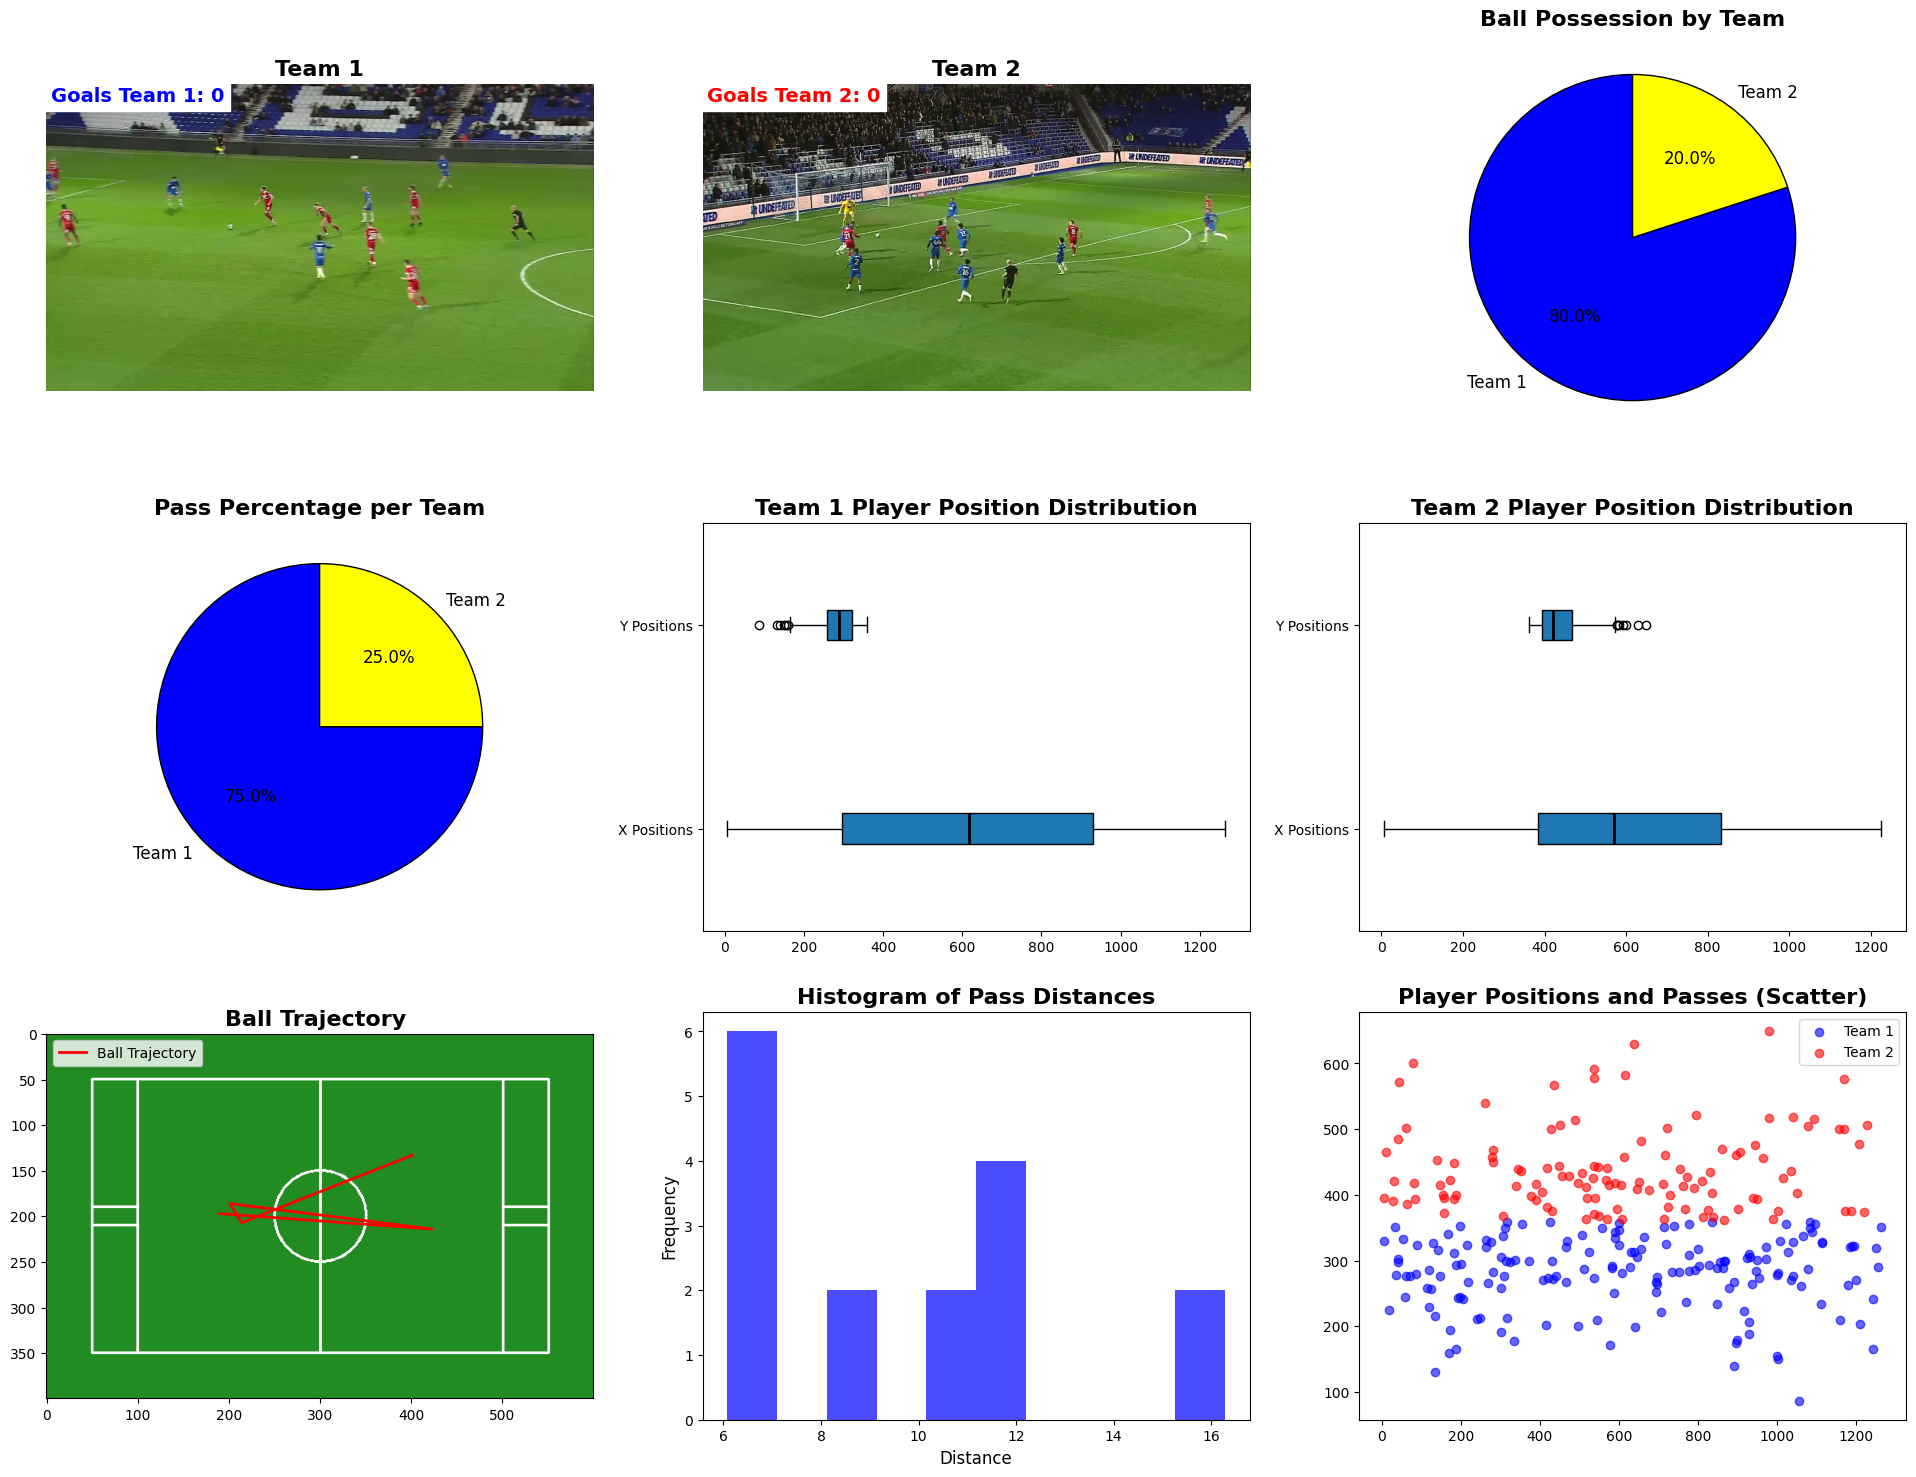

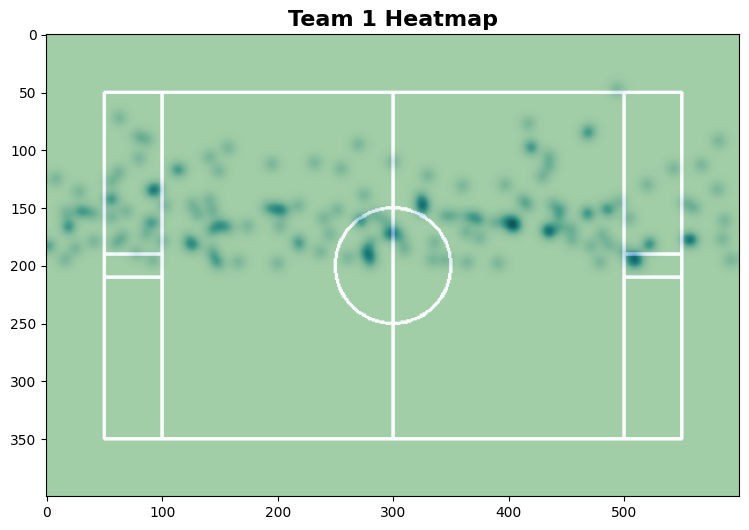

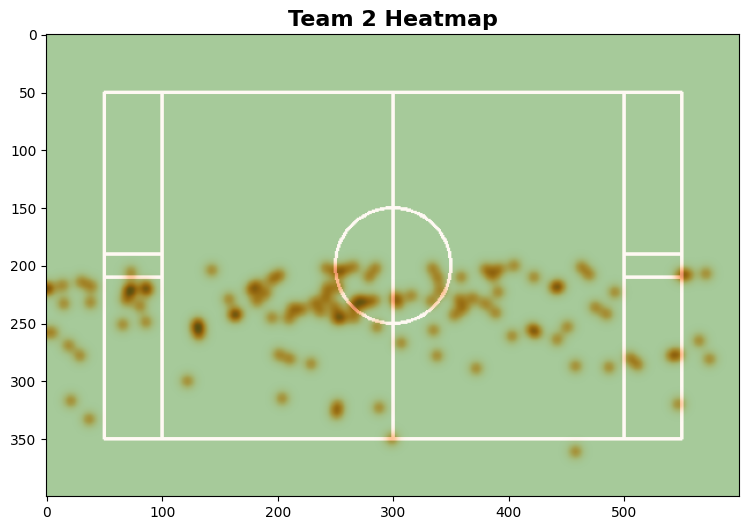

<Figure size 640x480 with 0 Axes>

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random
from ultralytics import YOLO

# Configuration
FRAME_SKIP = 90  # Process every 6th frame (higher = faster)
team_colors = {
    "Team 1": (255, 0, 0),    # Blue (BGR)
    "Team 2": (0, 255, 255),  # Yellow (BGR)
    "Goalkeeper": (0, 255, 0) # Green (BGR)
}

# Tactical pitch setup (Improved)
pitch_size = (600, 400)
tactical_pitch = np.zeros((pitch_size[1], pitch_size[0], 3), dtype=np.uint8)
tactical_pitch[:] = (34, 139, 34)
# Draw pitch markings (improve with center circle, goal boxes)
cv2.rectangle(tactical_pitch, (50, 50), (pitch_size[0]-50, pitch_size[1]-50), (255,255,255), 2)
cv2.line(tactical_pitch, (pitch_size[0]//2, 50), (pitch_size[0]//2, pitch_size[1]-50), (255,255,255), 2)
cv2.circle(tactical_pitch, (pitch_size[0]//2, pitch_size[1]//2), 50, (255,255,255), 2)
cv2.line(tactical_pitch, (100, 50), (100, pitch_size[1]-50), (255, 255, 255), 2)
cv2.line(tactical_pitch, (pitch_size[0]-100, 50), (pitch_size[0]-100, pitch_size[1]-50), (255, 255, 255), 2)
cv2.rectangle(tactical_pitch, (50, pitch_size[1]//2 - 10), (100, pitch_size[1]//2 + 10), (255, 255, 255), 2)
cv2.rectangle(tactical_pitch, (pitch_size[0]-100, pitch_size[1]//2 - 10), (pitch_size[0]-50, pitch_size[1]//2 + 10), (255, 255, 255), 2)

# Video processing
cap = cv2.VideoCapture(video_path)  # Update video path
if not cap.isOpened():
    print("Error opening video")
    exit()

# Data collection
ball_trajectory = []
possession = {"Team 1": 0, "Team 2": 0}
passes = {"Team 1": 0, "Team 2": 0}
goals = {"Team 1": 0, "Team 2": 0}
frame_count = 0
event_frames = []
player_positions = {"Team 1": [], "Team 2": []}
pass_distances = []

# Main processing loop
while True:
    ret = cap.grab()
    if not ret: break
    
    if frame_count % (FRAME_SKIP + 1) == 0:
        ret, frame = cap.retrieve()
        if not ret: break

        # YOLO detection
        results = model(frame)[0]
        
        # Process detections
        frame_players = []
        ball_position = None
        ball_cross_goal_line = False
        
        for detection in results.boxes.data:
            x1, y1, x2, y2, conf, cls = detection.tolist()
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            center = ((x1+x2)//2, (y1+y2)//2)
            
            if int(cls) == 0:  # Player
                team = "Team 1" if center[1] < frame.shape[0]//2 else "Team 2"
                frame_players.append((center, team))
                player_positions[team].append(center)
                
            elif int(cls) == 32:  # Ball
                ball_position = center
                tx = int((center[0]/frame.shape[1]) * pitch_size[0])
                ty = int((center[1]/frame.shape[0]) * pitch_size[1])
                ball_trajectory.append((tx, ty))
                
                if center[0] < 50 or center[0] > frame.shape[1] - 50:
                    ball_cross_goal_line = True

        # Possession calculation
        if ball_position and frame_players:
            closest_dist = float('inf')
            closest_team = None
            for (p_center, team) in frame_players:
                dist = abs(p_center[0]-ball_position[0]) + abs(p_center[1]-ball_position[1])
                if dist < closest_dist:
                    closest_dist = dist
                    closest_team = team
            if closest_team:
                possession[closest_team] += 1
        
        # Pass detection
        if len(frame_players) > 1 and ball_position:
            for i, (p1, team1) in enumerate(frame_players):
                for j, (p2, team2) in enumerate(frame_players):
                    if i != j and team1 == team2:
                        dist = np.linalg.norm(np.array(p1) - np.array(p2))
                        if dist < 50:
                            passes[team1] += 1
                            pass_distances.append(dist)
                            event_frames.append((frame, passes.copy(), goals.copy()))

        # Goal detection
        if ball_cross_goal_line:
            if ball_position[0] < 50:
                goals["Team 1"] += 1
            elif ball_position[0] > frame.shape[1] - 50:
                goals["Team 2"] += 1
            event_frames.append((frame, passes.copy(), goals.copy()))
    
    frame_count += 1

# Select random frames (2 frames)
random_frames = random.sample(event_frames, 2)

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(24, 18))

# Team 1
ax1 = axes[0, 0]
ax1.imshow(cv2.cvtColor(random_frames[0][0], cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax1.text(10, 40, f"Goals Team 1: {goals['Team 1']}", fontsize=14, color='blue', 
         backgroundcolor='white', weight='bold')
ax1.set_title("Team 1", fontsize=16, weight='bold')

# Team 2
ax2 = axes[0, 1]
ax2.imshow(cv2.cvtColor(random_frames[1][0], cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax2.text(10, 40, f"Goals Team 2: {goals['Team 2']}", fontsize=14, color='red', 
         backgroundcolor='white', weight='bold')
ax2.set_title("Team 2", fontsize=16, weight='bold')

# ✅ Pie chart for possession percentage (NEW)
ax_possession = axes[0, 2]
total_possession = possession['Team 1'] + possession['Team 2']
possession_percentage = {
    "Team 1": (possession['Team 1'] / total_possession) * 100 if total_possession > 0 else 0,
    "Team 2": (possession['Team 2'] / total_possession) * 100 if total_possession > 0 else 0
}
labels_possession = possession_percentage.keys()
sizes_possession = possession_percentage.values()
colors_possession = ['blue', 'yellow']
ax_possession.pie(sizes_possession, labels=labels_possession, colors=colors_possession, autopct='%1.1f%%', 
                  startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
ax_possession.set_title("Ball Possession by Team", fontsize=16, weight='bold')

# Pie chart for pass percentage
ax3 = axes[1, 0]
total_passes = passes['Team 1'] + passes['Team 2']
pass_percentage = {
    "Team 1": (passes['Team 1'] / total_passes) * 100 if total_passes > 0 else 0,
    "Team 2": (passes['Team 2'] / total_passes) * 100 if total_passes > 0 else 0
}
labels = pass_percentage.keys()
sizes = pass_percentage.values()
colors = ['blue', 'yellow']
ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
ax3.set_title("Pass Percentage per Team", fontsize=16, weight='bold')

# Box plot for player positions (Team 1)
ax4 = axes[1, 1]
team_1_positions = np.array(player_positions["Team 1"])
ax4.boxplot([team_1_positions[:, 0], team_1_positions[:, 1]], vert=False, patch_artist=True, 
            medianprops=dict(color="black", linewidth=2))
ax4.set_yticklabels(['X Positions', 'Y Positions'])
ax4.set_title("Team 1 Player Position Distribution", fontsize=16, weight='bold')

# Box plot for player positions (Team 2)
ax5 = axes[1, 2]
team_2_positions = np.array(player_positions["Team 2"])
ax5.boxplot([team_2_positions[:, 0], team_2_positions[:, 1]], vert=False, patch_artist=True, 
            medianprops=dict(color="black", linewidth=2))
ax5.set_yticklabels(['X Positions', 'Y Positions'])
ax5.set_title("Team 2 Player Position Distribution", fontsize=16, weight='bold')

# Ball trajectory
ax6 = axes[2, 0]
ball_trajectory_arr = np.array(ball_trajectory)
ax6.imshow(tactical_pitch)
ax6.plot(ball_trajectory_arr[:, 0], ball_trajectory_arr[:, 1], color='red', label='Ball Trajectory', linewidth=2)
for (player, team) in frame_players:
    ax6.scatter(player[0], player[1], color=team_colors[team], s=100, label=team if team not in ax6.get_legend_handles_labels()[1] else "", edgecolors='black')
ax6.set_title("Ball Trajectory ", fontsize=16, weight='bold')
ax6.legend(loc='upper left')

# Histogram of pass distances
ax7 = axes[2, 1]
ax7.hist(pass_distances, bins=10, color='blue', alpha=0.7)
ax7.set_title("Histogram of Pass Distances", fontsize=16, weight='bold')
ax7.set_xlabel("Distance", fontsize=12)
ax7.set_ylabel("Frequency", fontsize=12)

# Scatter plot for player positions
ax8 = axes[2, 2]
team_1_passes = np.array(player_positions["Team 1"])
team_2_passes = np.array(player_positions["Team 2"])
ax8.scatter(team_1_passes[:, 0], team_1_passes[:, 1], color='blue', label='Team 1', alpha=0.6)
ax8.scatter(team_2_passes[:, 0], team_2_passes[:, 1], color='red', label='Team 2', alpha=0.6)
ax8.set_title("Player Positions and Passes (Scatter)", fontsize=16, weight='bold')
ax8.legend(loc='upper right')

# Create a separate plot for Team Heatmaps
fig, ax = plt.subplots(figsize=(10, 6))  # Separate figure for team heatmaps

# Initialize heatmaps for both teams
heatmap_team1 = np.zeros((pitch_size[1], pitch_size[0]), dtype=np.float32)
heatmap_team2 = np.zeros((pitch_size[1], pitch_size[0]), dtype=np.float32)

# Populate heatmaps from player positions
for team_name, color, heatmap in [("Team 1", "cyan", heatmap_team1), ("Team 2", "red", heatmap_team2)]:
    for pos in player_positions[team_name]:
        x = int((pos[0] / frame.shape[1]) * pitch_size[0])
        y = int((pos[1] / frame.shape[0]) * pitch_size[1])
        if 0 <= x < pitch_size[0] and 0 <= y < pitch_size[1]:
            heatmap[y, x] += 1

# Apply Gaussian blur to smooth the heatmaps
heatmap_team1 = cv2.GaussianBlur(heatmap_team1, (31, 31), 0)
heatmap_team2 = cv2.GaussianBlur(heatmap_team2, (31, 31), 0)

# Normalize the heatmaps
if heatmap_team1.max() > 0:
    heatmap_team1 = heatmap_team1 / heatmap_team1.max()
if heatmap_team2.max() > 0:
    heatmap_team2 = heatmap_team2 / heatmap_team2.max()

# Plot Team 1 heatmap with dark blue colors (using 'Blues' colormap)
ax.imshow(tactical_pitch)
ax.imshow(heatmap_team1, cmap='Blues', alpha=0.6)  # Dark Blue for Team 1
ax.set_title("Team 1 Heatmap", fontsize=16, weight='bold')

# Plot Team 2 heatmap with dark orange colors (using 'Oranges' colormap)
fig, ax = plt.subplots(figsize=(10, 6))  # New plot for Team 2 Heatmap
ax.imshow(tactical_pitch)
ax.imshow(heatmap_team2, cmap='Oranges', alpha=0.6)  # Dark Orange for Team 2
ax.set_title("Team 2 Heatmap", fontsize=16, weight='bold')

# Show the heatmaps separately
plt.show()

plt.tight_layout()
plt.show()



0: 384x640 1 toilet, 430.2ms
Speed: 39.9ms preprocess, 430.2ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 stop sign, 378.8ms
Speed: 7.4ms preprocess, 378.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 262.0ms
Speed: 4.3ms preprocess, 262.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 sports ball, 211.5ms
Speed: 4.0ms preprocess, 211.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 1 sports ball, 170.6ms
Speed: 3.9ms preprocess, 170.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 214.4ms
Speed: 5.2ms preprocess, 214.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 188.9ms
Speed: 4.9ms preprocess, 188.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 241.1ms
Speed: 6.7ms preprocess, 241.1m

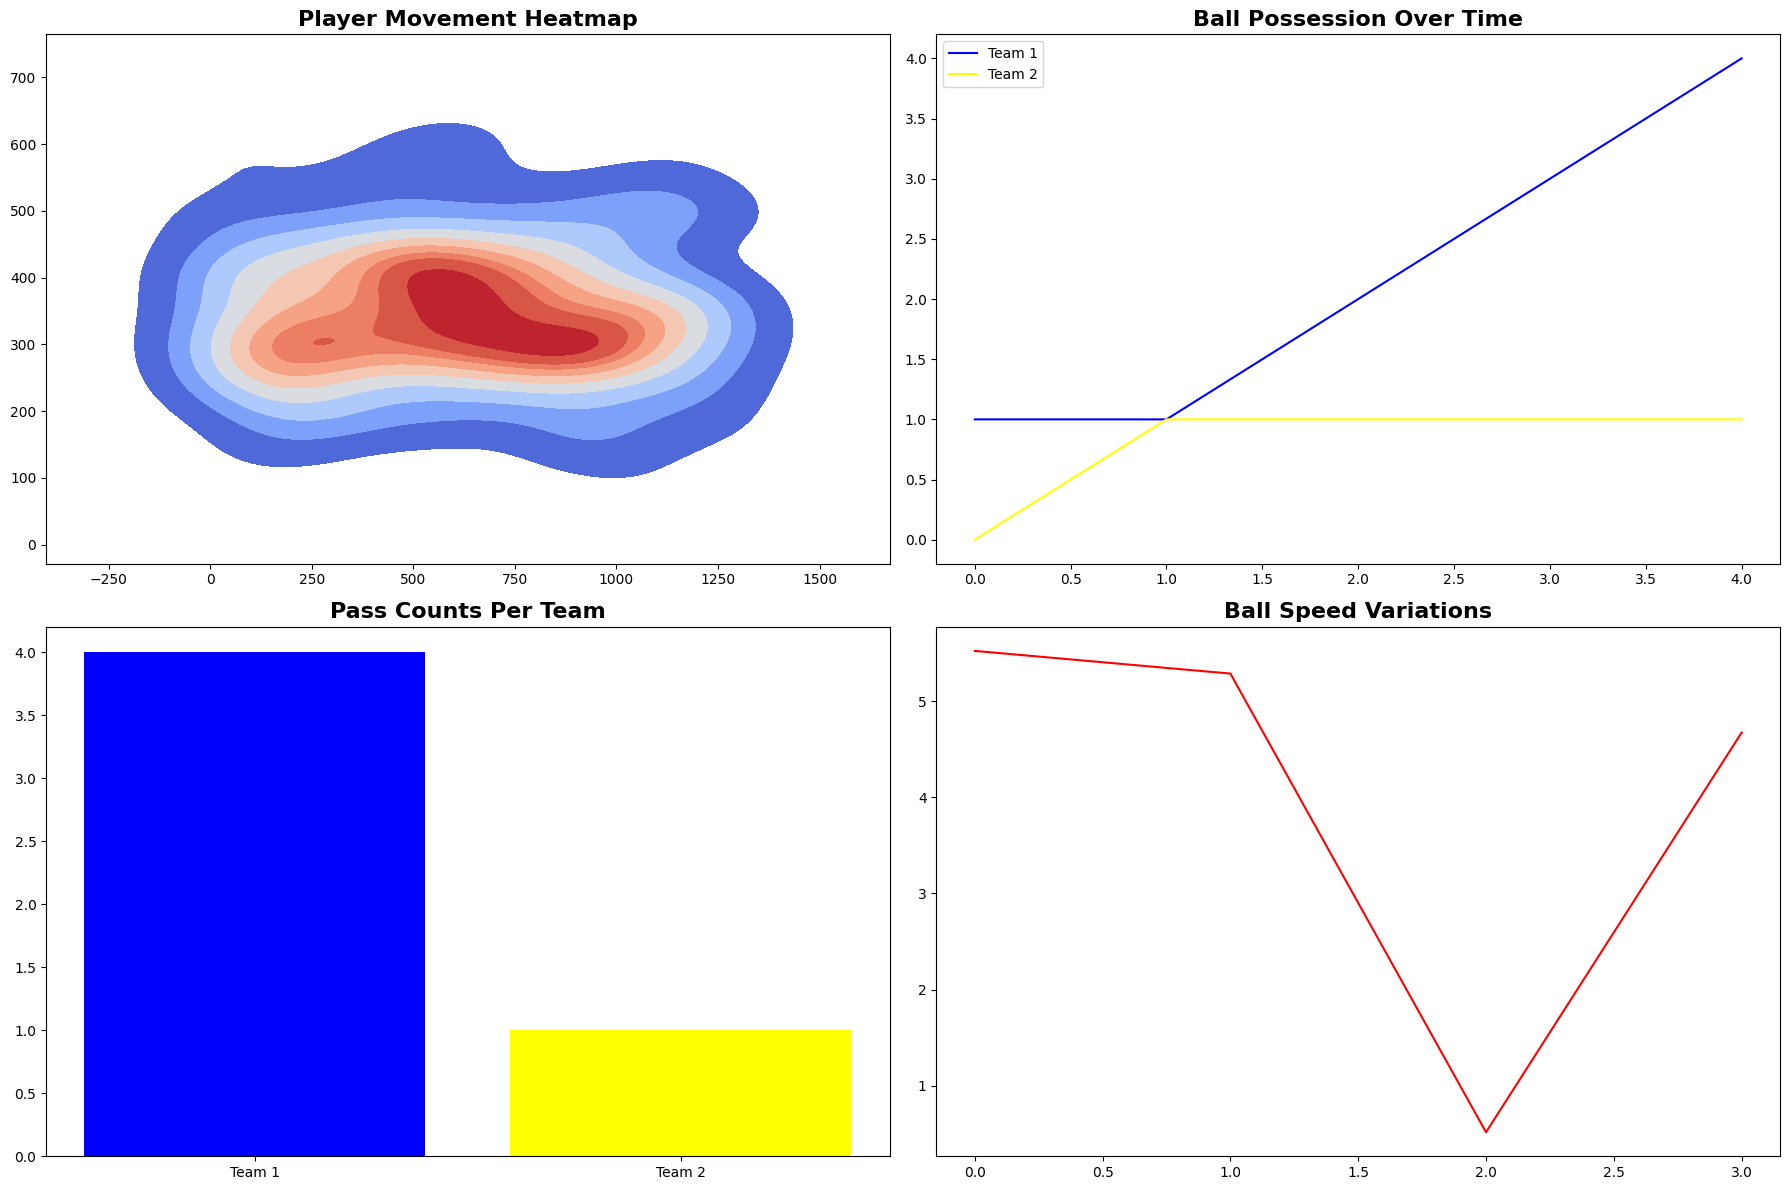

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import random
from ultralytics import YOLO

# Configuration
FRAME_SKIP = 90  # Process every 6th frame (higher = faster)

# Video processing
cap = cv2.VideoCapture(video_path)  # Update video path
if not cap.isOpened():
    print("Error opening video")
    exit()

# Data collection
ball_positions = []
player_positions = {"Team 1": [], "Team 2": []}
pass_counts = {"Team 1": 0, "Team 2": 0}
possession_over_time = {"Team 1": [], "Team 2": []}
ball_speeds = []
frame_count = 0
last_ball_position = None

# Processing loop
while True:
    ret = cap.grab()
    if not ret: break
    
    if frame_count % (FRAME_SKIP + 1) == 0:
        ret, frame = cap.retrieve()
        if not ret: break

        results = model(frame)[0]
        ball_position = None
        frame_players = []
        
        for detection in results.boxes.data:
            x1, y1, x2, y2, conf, cls = detection.tolist()
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            center = ((x1+x2)//2, (y1+y2)//2)
            
            if int(cls) == 0:  # Player
                team = "Team 1" if center[1] < frame.shape[0]//2 else "Team 2"
                frame_players.append((center, team))
                player_positions[team].append(center)
            
            elif int(cls) == 32:  # Ball
                ball_position = center
                ball_positions.append(center)
                
                if last_ball_position is not None:
                    dist = np.linalg.norm(np.array(center) - np.array(last_ball_position))
                    ball_speeds.append(dist / FRAME_SKIP)  # Approximate speed
                last_ball_position = center

        # Possession tracking
        if ball_position and frame_players:
            closest_team = min(frame_players, key=lambda p: abs(p[0][0]-ball_position[0]) + abs(p[0][1]-ball_position[1]))[1]
            pass_counts[closest_team] += 1
            possession_over_time["Team 1"].append(pass_counts["Team 1"])
            possession_over_time["Team 2"].append(pass_counts["Team 2"])
    
    frame_count += 1

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Heatmap for player positions
ax1 = axes[0, 0]
all_positions = np.array(player_positions["Team 1"] + player_positions["Team 2"])
if len(all_positions) > 0:
    sns.kdeplot(x=[p[0] for p in all_positions], y=[p[1] for p in all_positions], cmap="coolwarm", fill=True, ax=ax1)
ax1.set_title("Player Movement Heatmap", fontsize=16, weight='bold')

# Line plot for ball possession
ax2 = axes[0, 1]
ax2.plot(possession_over_time["Team 1"], label="Team 1", color='blue')
ax2.plot(possession_over_time["Team 2"], label="Team 2", color='yellow')
ax2.set_title("Ball Possession Over Time", fontsize=16, weight='bold')
ax2.legend()

# Bar chart for pass comparison
ax3 = axes[1, 0]
ax3.bar(pass_counts.keys(), pass_counts.values(), color=['blue', 'yellow'])
ax3.set_title("Pass Counts Per Team", fontsize=16, weight='bold')

# Velocity plot for ball speed
ax4 = axes[1, 1]
ax4.plot(ball_speeds, color='red')
ax4.set_title("Ball Speed Variations", fontsize=16, weight='bold')

plt.tight_layout()
plt.show()


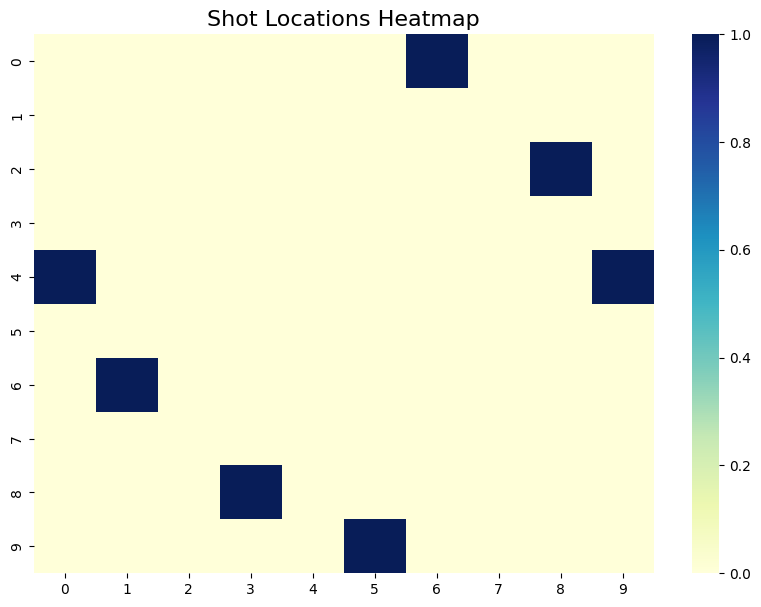

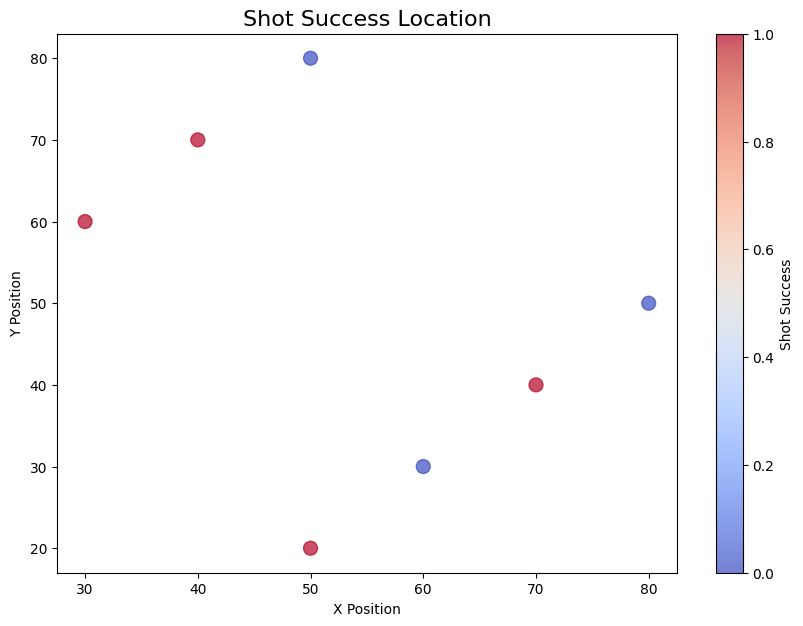

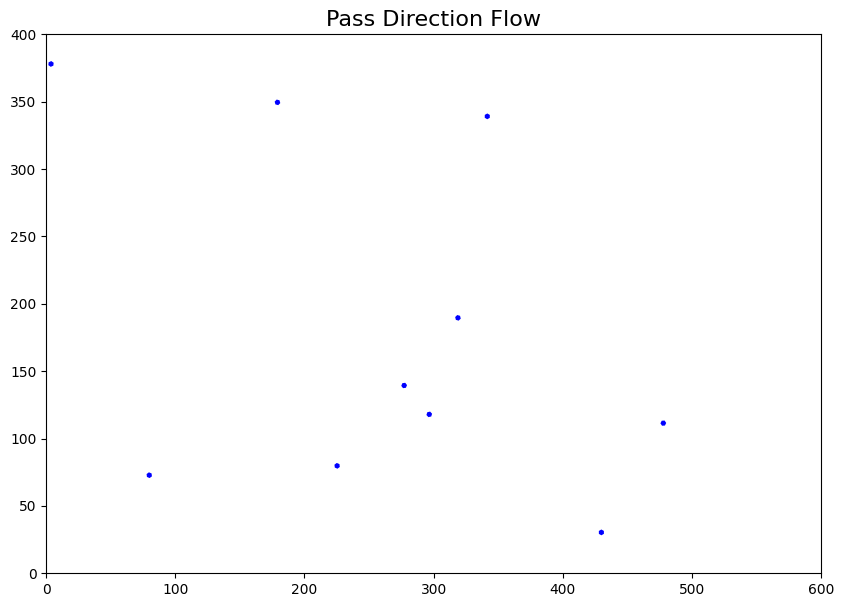

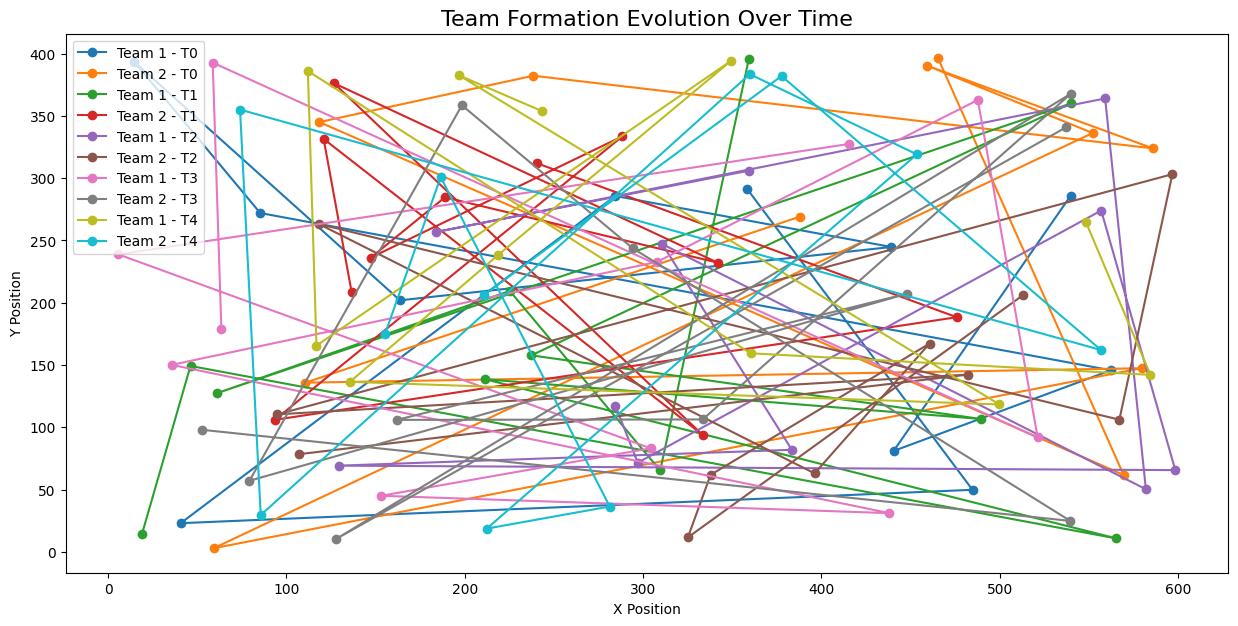

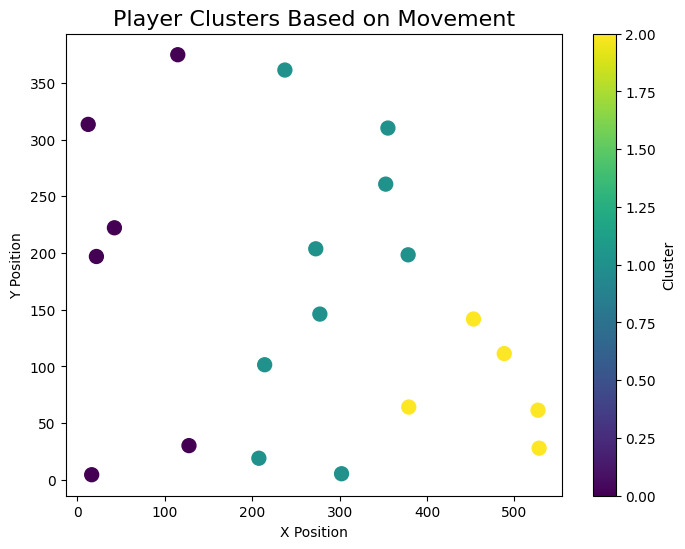

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import networkx as nx

# 1. Shot Locations and Shot Success Rate (Heatmap & Scatter Plot)
# Assuming shot data: (x, y) positions for shots and success rate (1 = successful, 0 = missed)
shot_data = {
    'x': [50, 60, 70, 80, 30, 40, 50],  # x-coordinates of shots
    'y': [20, 30, 40, 50, 60, 70, 80],  # y-coordinates of shots
    'success': [1, 0, 1, 0, 1, 1, 0]   # 1 for success, 0 for miss
}

shots_df = pd.DataFrame(shot_data)

# Heatmap for shot locations
plt.figure(figsize=(10, 7))
sns.heatmap(np.histogram2d(shots_df['x'], shots_df['y'], bins=(10, 10))[0], cmap='YlGnBu')
plt.title("Shot Locations Heatmap", fontsize=16)
plt.show()

# Scatter plot for shot success and position
plt.figure(figsize=(10, 7))
plt.scatter(shots_df['x'], shots_df['y'], c=shots_df['success'], cmap='coolwarm', s=100, alpha=0.7)
plt.title("Shot Success Location", fontsize=16)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.colorbar(label="Shot Success")
plt.show()

# 2. Pass Direction Flow (Vector Field)
# Example: showing pass directions with a vector field (simplified)
pass_directions = np.random.rand(10, 2)  # Random pass directions (x, y)
pass_positions = np.random.rand(10, 2) * pitch_size  # Random positions for passes

plt.figure(figsize=(10, 7))
plt.quiver(pass_positions[:, 0], pass_positions[:, 1], pass_directions[:, 0], pass_directions[:, 1], angles='xy', scale_units='xy', scale=1, color='blue')
plt.title("Pass Direction Flow", fontsize=16)
plt.xlim(0, pitch_size[0])
plt.ylim(0, pitch_size[1])
plt.show()

# 3. Key Player Influence (Centrality or Betweenness Centrality)
# Assuming a graph of player interactions from pass data (network)
G = nx.Graph()
for i, player in enumerate(frame_players):
    player_id = f"Player {i+1}"
    G.add_node(player_id, pos=player[0])

# Add edges (passes)
for i, (p1, team1) in enumerate(frame_players):
    for j, (p2, team2) in enumerate(frame_players):
        if i != j and team1 == team2:
            dist = np.linalg.norm(np.array(p1) - np.array(p2))
            if dist < 100:  # Threshold for pass
                G.add_edge(f"Player {i+1}", f"Player {j+1}", weight=dist)

# Calculate centrality (betweenness centrality)
centrality = nx.betweenness_centrality(G)


# 4. Team Formation Over Time (Evolution of Shape)
# Example: tracking the team's shape evolution at different time frames
# Generating some example data (positions over time)
time_frames = np.arange(5)
team_formation = {
    'Team 1': np.random.rand(5, 11, 2) * pitch_size,  # 5 time frames, 11 players
    'Team 2': np.random.rand(5, 11, 2) * pitch_size   # 5 time frames, 11 players
}

plt.figure(figsize=(15, 7))
for t in time_frames:
    plt.plot(team_formation['Team 1'][t, :, 0], team_formation['Team 1'][t, :, 1], marker='o', label=f'Team 1 - T{t}')
    plt.plot(team_formation['Team 2'][t, :, 0], team_formation['Team 2'][t, :, 1], marker='o', label=f'Team 2 - T{t}')
plt.title("Team Formation Evolution Over Time", fontsize=16)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc='upper left')
plt.show()

# 5. Player Cluster Map (Clustering of Players Based on Movement)
# Example: Cluster players based on their movement patterns
player_positions = np.random.rand(20, 2) * pitch_size  # Random positions
kmeans = KMeans(n_clusters=3).fit(player_positions)  # Clustering into 3 clusters

plt.figure(figsize=(8, 6))
plt.scatter(player_positions[:, 0], player_positions[:, 1], c=kmeans.labels_, cmap='viridis', s=100)
plt.title("Player Clusters Based on Movement", fontsize=16)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.colorbar(label="Cluster")
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file
file_path = "detections.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


           Time    Team  Player ID  Position X  Position Y  Ball Speed  \
0  1.743761e+09  Team 1          1         916         408         0.0   
1  1.743761e+09  Team 1          2         102         326         0.0   
2  1.743761e+09  Team 1          3        1201         438         0.0   
3  1.743761e+09  Team 1          4         713         506         0.0   
4  1.743761e+09  Team 1          5         380         545         0.0   

  Pass Detected  
0       No Pass  
1       No Pass  
2       No Pass  
3       No Pass  
4       No Pass  


In [22]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = "detections.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe for verification
print(df.head())

# 1. Data Cleaning
# Convert 'Time' to datetime (assuming it's in Unix timestamp format)
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Fill missing values
df['Ball Speed'].fillna(method='ffill', inplace=True)  # Forward fill for Ball Speed
df['Position X'].fillna(method='ffill', inplace=True)  # Forward fill for Position X
df['Position Y'].fillna(method='ffill', inplace=True)  # Forward fill for Position Y

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# 2. Feature Engineering
# Calculate the player movement between consecutive frames (Euclidean distance)
df['Player Movement'] = np.sqrt((df['Position X'].diff())**2 + (df['Position Y'].diff())**2)



# 3. Zone Assignment (for tactical analysis)
pitch_width = 1000  # Example width of the pitch (in pixels)
pitch_height = 600  # Example height of the pitch (in pixels)

# Divide the pitch into 3x3 zones (you can adjust the number of zones as needed)
zone_width = pitch_width // 3
zone_height = pitch_height // 3

def get_zone(x, y):
    """Assign the player/ball to a zone based on X, Y position."""
    x_zone = min(x // zone_width, 2)  # Ensure it stays within 0-2 range
    y_zone = min(y // zone_height, 2)
    return f"Zone {x_zone + 1}-{y_zone + 1}"

# Apply the zone function to player positions and ball positions
df['Player Zone'] = df.apply(lambda row: get_zone(row['Position X'], row['Position Y']), axis=1)

# 4. Additional Preparations
# Convert 'Time' column to a numeric value (timestamp) for easier time-based analysis if needed
df['Timestamp'] = df['Time'].astype(np.int64) // 10**9  # Convert to seconds

# Display the cleaned and processed data
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv('prepared_detections.csv', index=False)


           Time    Team  Player ID  Position X  Position Y  Ball Speed  \
0  1.743761e+09  Team 1          1         916         408         0.0   
1  1.743761e+09  Team 1          2         102         326         0.0   
2  1.743761e+09  Team 1          3        1201         438         0.0   
3  1.743761e+09  Team 1          4         713         506         0.0   
4  1.743761e+09  Team 1          5         380         545         0.0   

  Pass Detected  
0       No Pass  
1       No Pass  
2       No Pass  
3       No Pass  
4       No Pass  
                           Time    Team  Player ID  Position X  Position Y  \
0 2025-04-04 09:59:09.369776726  Team 1          1         916         408   
1 2025-04-04 09:59:09.369776726  Team 1          2         102         326   
2 2025-04-04 09:59:09.369776726  Team 1          3        1201         438   
3 2025-04-04 09:59:09.369776726  Team 1          4         713         506   
4 2025-04-04 09:59:09.369776726  Team 1          5       

C:\Users\ameni\AppData\Local\Temp\ipykernel_45940\2753275992.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ball Speed'].fillna(method='ffill', inplace=True)  # Forward fill for Ball Speed
C:\Users\ameni\AppData\Local\Temp\ipykernel_45940\2753275992.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ball Speed'].fillna(method='ffill', inplace=True)  # Forward fill for Ball Speed
C:\Users\ameni\AppData\Local\Temp\ipykernel_4

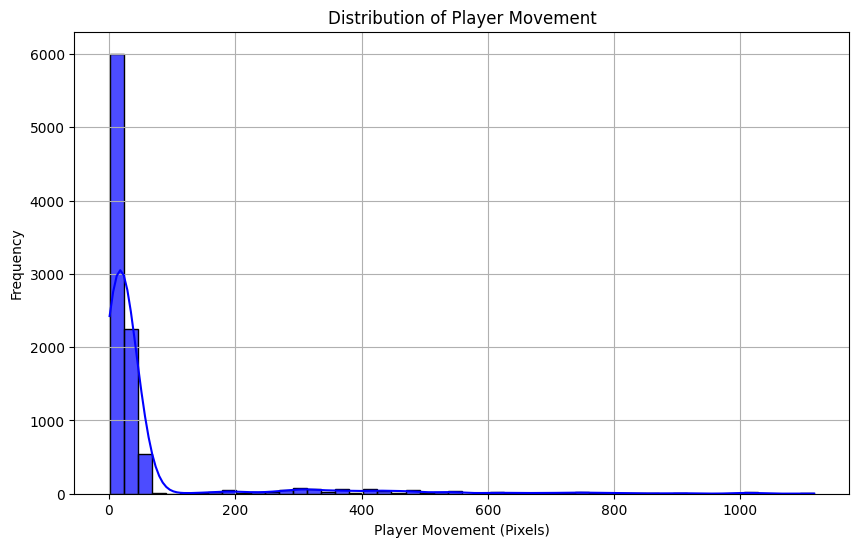

✅ Tactical Suggestion: The team is showing adequate movement. Focus on maintaining the current intensity.


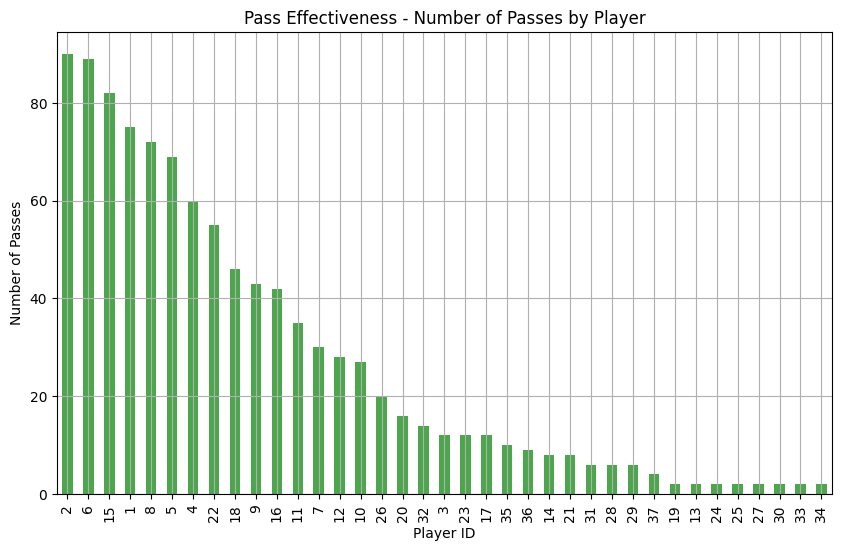

✅ Tactical Suggestion: The team is performing well in passing. Consider introducing more complex passing patterns.


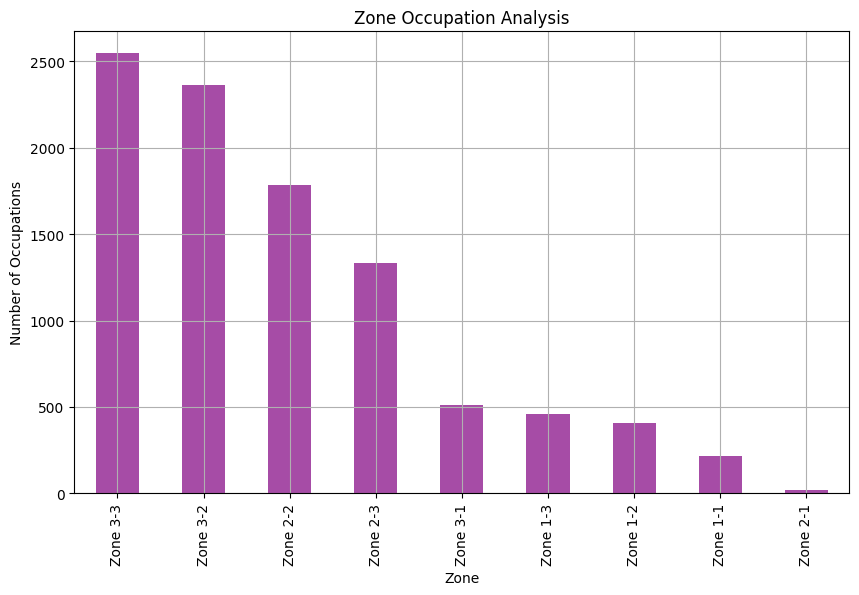

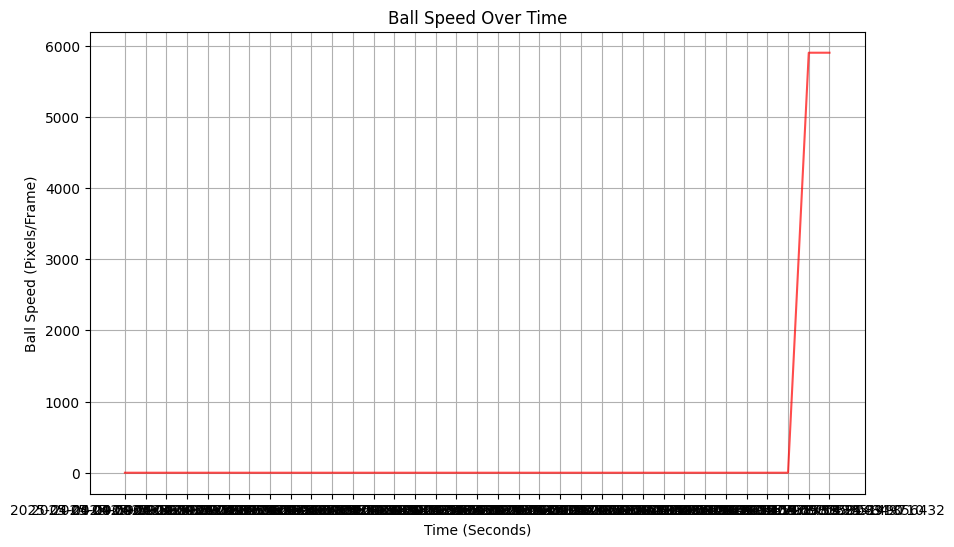

✅ Tactical Suggestion: The current ball speed is satisfactory, focus on maintaining or slightly increasing it during counter-attacks.
⚠️ Tactical Suggestion: Focus on increasing movement in the following zones:
  - Zone: Zone 2-1, Average Movement: 12.083045973594572 pixels
  - Zone: Zone 2-2, Average Movement: 37.43653407300196 pixels
  - Zone: Zone 2-3, Average Movement: 37.82946562114734 pixels
  - Zone: Zone 3-1, Average Movement: 44.93206322277921 pixels
  - Zone: Zone 3-2, Average Movement: 48.66352558845573 pixels


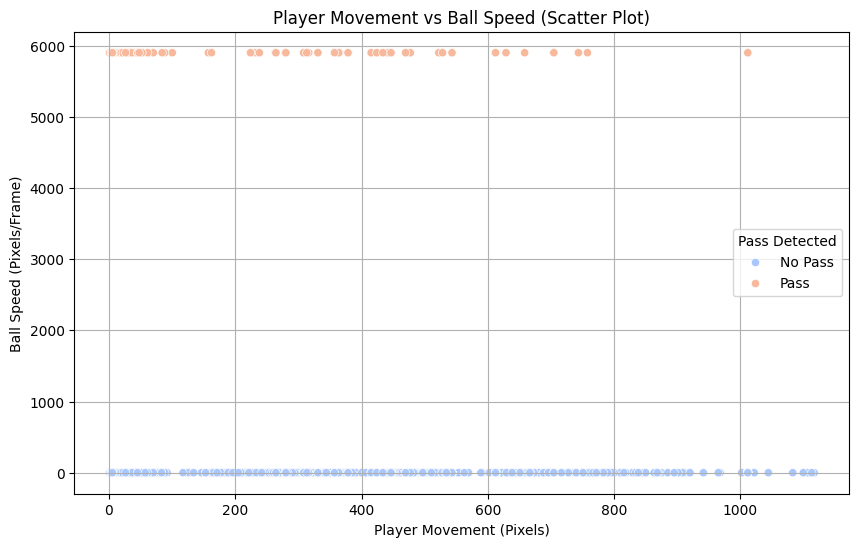

⚠️ Tactical Suggestion: These players need to improve both their movement and ball speed for better contributions in the game.
Players to focus on: [14 15  1  2  3  4  5  6  7  8  9 10 11 12 16 17 18 19 20 21 22 26 28 29
 31 23 35 32 36]

Tactical recommendations are based on player movement, pass effectiveness, zone occupation, and ball speed.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared dataset
file_path = "prepared_detections.csv"
df = pd.read_csv(file_path)

# 1. Player Movement Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Player Movement'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Player Movement')
plt.xlabel('Player Movement (Pixels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Recommendation based on Player Movement Distribution
avg_player_movement = df['Player Movement'].mean()
if avg_player_movement < 50:
    print("⚠️ Tactical Suggestion: Encourage more off-the-ball movement. Players need to make more runs to support the ball carrier.")
else:
    print("✅ Tactical Suggestion: The team is showing adequate movement. Focus on maintaining the current intensity.")

# 2. Pass Effectiveness Plot (Pass Counts per Player)
pass_counts = df[df['Pass Detected'] == 'Pass'].groupby('Player ID').size()
plt.figure(figsize=(10, 6))
pass_counts.sort_values(ascending=False).plot(kind='bar', color='green', alpha=0.7)
plt.title('Pass Effectiveness - Number of Passes by Player')
plt.xlabel('Player ID')
plt.ylabel('Number of Passes')
plt.grid(True)
plt.show()

# Recommendation based on Pass Effectiveness
avg_pass_count = pass_counts.mean()
if avg_pass_count < 5:
    print("⚠️ Tactical Suggestion: Improve team passing. Focus on quick ball circulation and passing accuracy.")
else:
    print("✅ Tactical Suggestion: The team is performing well in passing. Consider introducing more complex passing patterns.")

# 3. Zone Occupation Plot (Bar Plot for Zone Occupation)
zone_occupation = df.groupby('Player Zone').size()
plt.figure(figsize=(10, 6))
zone_occupation.sort_values(ascending=False).plot(kind='bar', color='purple', alpha=0.7)
plt.title('Zone Occupation Analysis')
plt.xlabel('Zone')
plt.ylabel('Number of Occupations')
plt.grid(True)
plt.show()

# Recommendation based on Zone Occupation
defensive_zone_occupation = zone_occupation.get('Defensive', 0)
attacking_zone_occupation = zone_occupation.get('Attacking', 0)
midfield_zone_occupation = zone_occupation.get('Midfield', 0)

if defensive_zone_occupation > attacking_zone_occupation:
    print("⚠️ Tactical Suggestion: Focus on more aggressive positioning in the attacking zone. Players should move forward more often.")
if attacking_zone_occupation < midfield_zone_occupation:
    print("⚠️ Tactical Suggestion: Increase occupation in the attacking zone. Players should be more proactive in getting into offensive positions.")

# 4. Ball Speed Plot (Line Plot Over Time)
if 'Ball Speed' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['Ball Speed'], color='red', alpha=0.7)
    plt.title('Ball Speed Over Time')
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Ball Speed (Pixels/Frame)')
    plt.grid(True)
    plt.show()

    # Recommendation based on Ball Speed
    avg_ball_speed = df['Ball Speed'].mean()
    if avg_ball_speed < 2.0:
        print("⚠️ Tactical Suggestion: Increase the ball speed during transitions. Faster ball movement will catch the opponent off-guard.")
    else:
        print("✅ Tactical Suggestion: The current ball speed is satisfactory, focus on maintaining or slightly increasing it during counter-attacks.")



# Recommendation based on Player Movement by Zone
slow_moving_zones = player_zone_movement[player_zone_movement['Player Movement'] < 50]
if not slow_moving_zones.empty:
    print("⚠️ Tactical Suggestion: Focus on increasing movement in the following zones:")
    for zone, movement in zip(slow_moving_zones['Player Zone'], slow_moving_zones['Player Movement']):
        print(f"  - Zone: {zone}, Average Movement: {movement} pixels")

# 6. Overall Player Contributions (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Player Movement', y='Ball Speed', data=df, hue='Pass Detected', palette='coolwarm')
plt.title('Player Movement vs Ball Speed (Scatter Plot)')
plt.xlabel('Player Movement (Pixels)')
plt.ylabel('Ball Speed (Pixels/Frame)')
plt.legend(title='Pass Detected')
plt.grid(True)
plt.show()

# Recommendation based on Player Contributions
# Identify players with low movement and low ball speed
low_movement_low_speed = df[(df['Player Movement'] < 50) & (df['Ball Speed'] < 2)]
if not low_movement_low_speed.empty:
    print("⚠️ Tactical Suggestion: These players need to improve both their movement and ball speed for better contributions in the game.")
    print(f"Players to focus on: {low_movement_low_speed['Player ID'].unique()}")

# Display conclusion
print("\nTactical recommendations are based on player movement, pass effectiveness, zone occupation, and ball speed.")
